# mesa2txt Tutorial

In this tutorial, we will demonstrate how to import a typical "log" or "history" (`.data`) file from a MESA (Modules for Experiments
in Stellar Astrophysics) simulation and export the values of a single property and their corresponding stellar ages to a text (`.txt`) file.

## Import
We begin by using `mesa_reader` to import a `history.data` into Python. One __major benefit__ of using `mesa_reader`, over alternatives like `numpy.loadtxt` or `numpy.genfromtxt`, is that it _automatically accounts for and removes any redundant lines caused by restarts or backups_ that may have occured during a MESA run (see the "history.data" section [here](http://mesa.sourceforge.net/output.html#where-does-mesa-output-its-data) for more information). Thus, using `mesa_reader` and following this tutorial will __ensure the time-series monotonicity__ of your final `.txt` data output.

In [1]:
import mesa_reader as mr

data = mr.MesaData('LOGS/TRAPPIST-1/history_make_brown_dwarf.data') # path to data file

## Isolate

Next, we retrieve the specific stellar properties we wish to isolate and export by simply calling its column header, as seen on line 6 of a typical MESA `history.data` file. In the example shown below, we retrieve the stellar age and mass by calling `data.star_age` and `data.star_mass`.

In [2]:
ages = data.star_age
masses = data.star_mass
radii = data.radius
lumins = data.luminosity

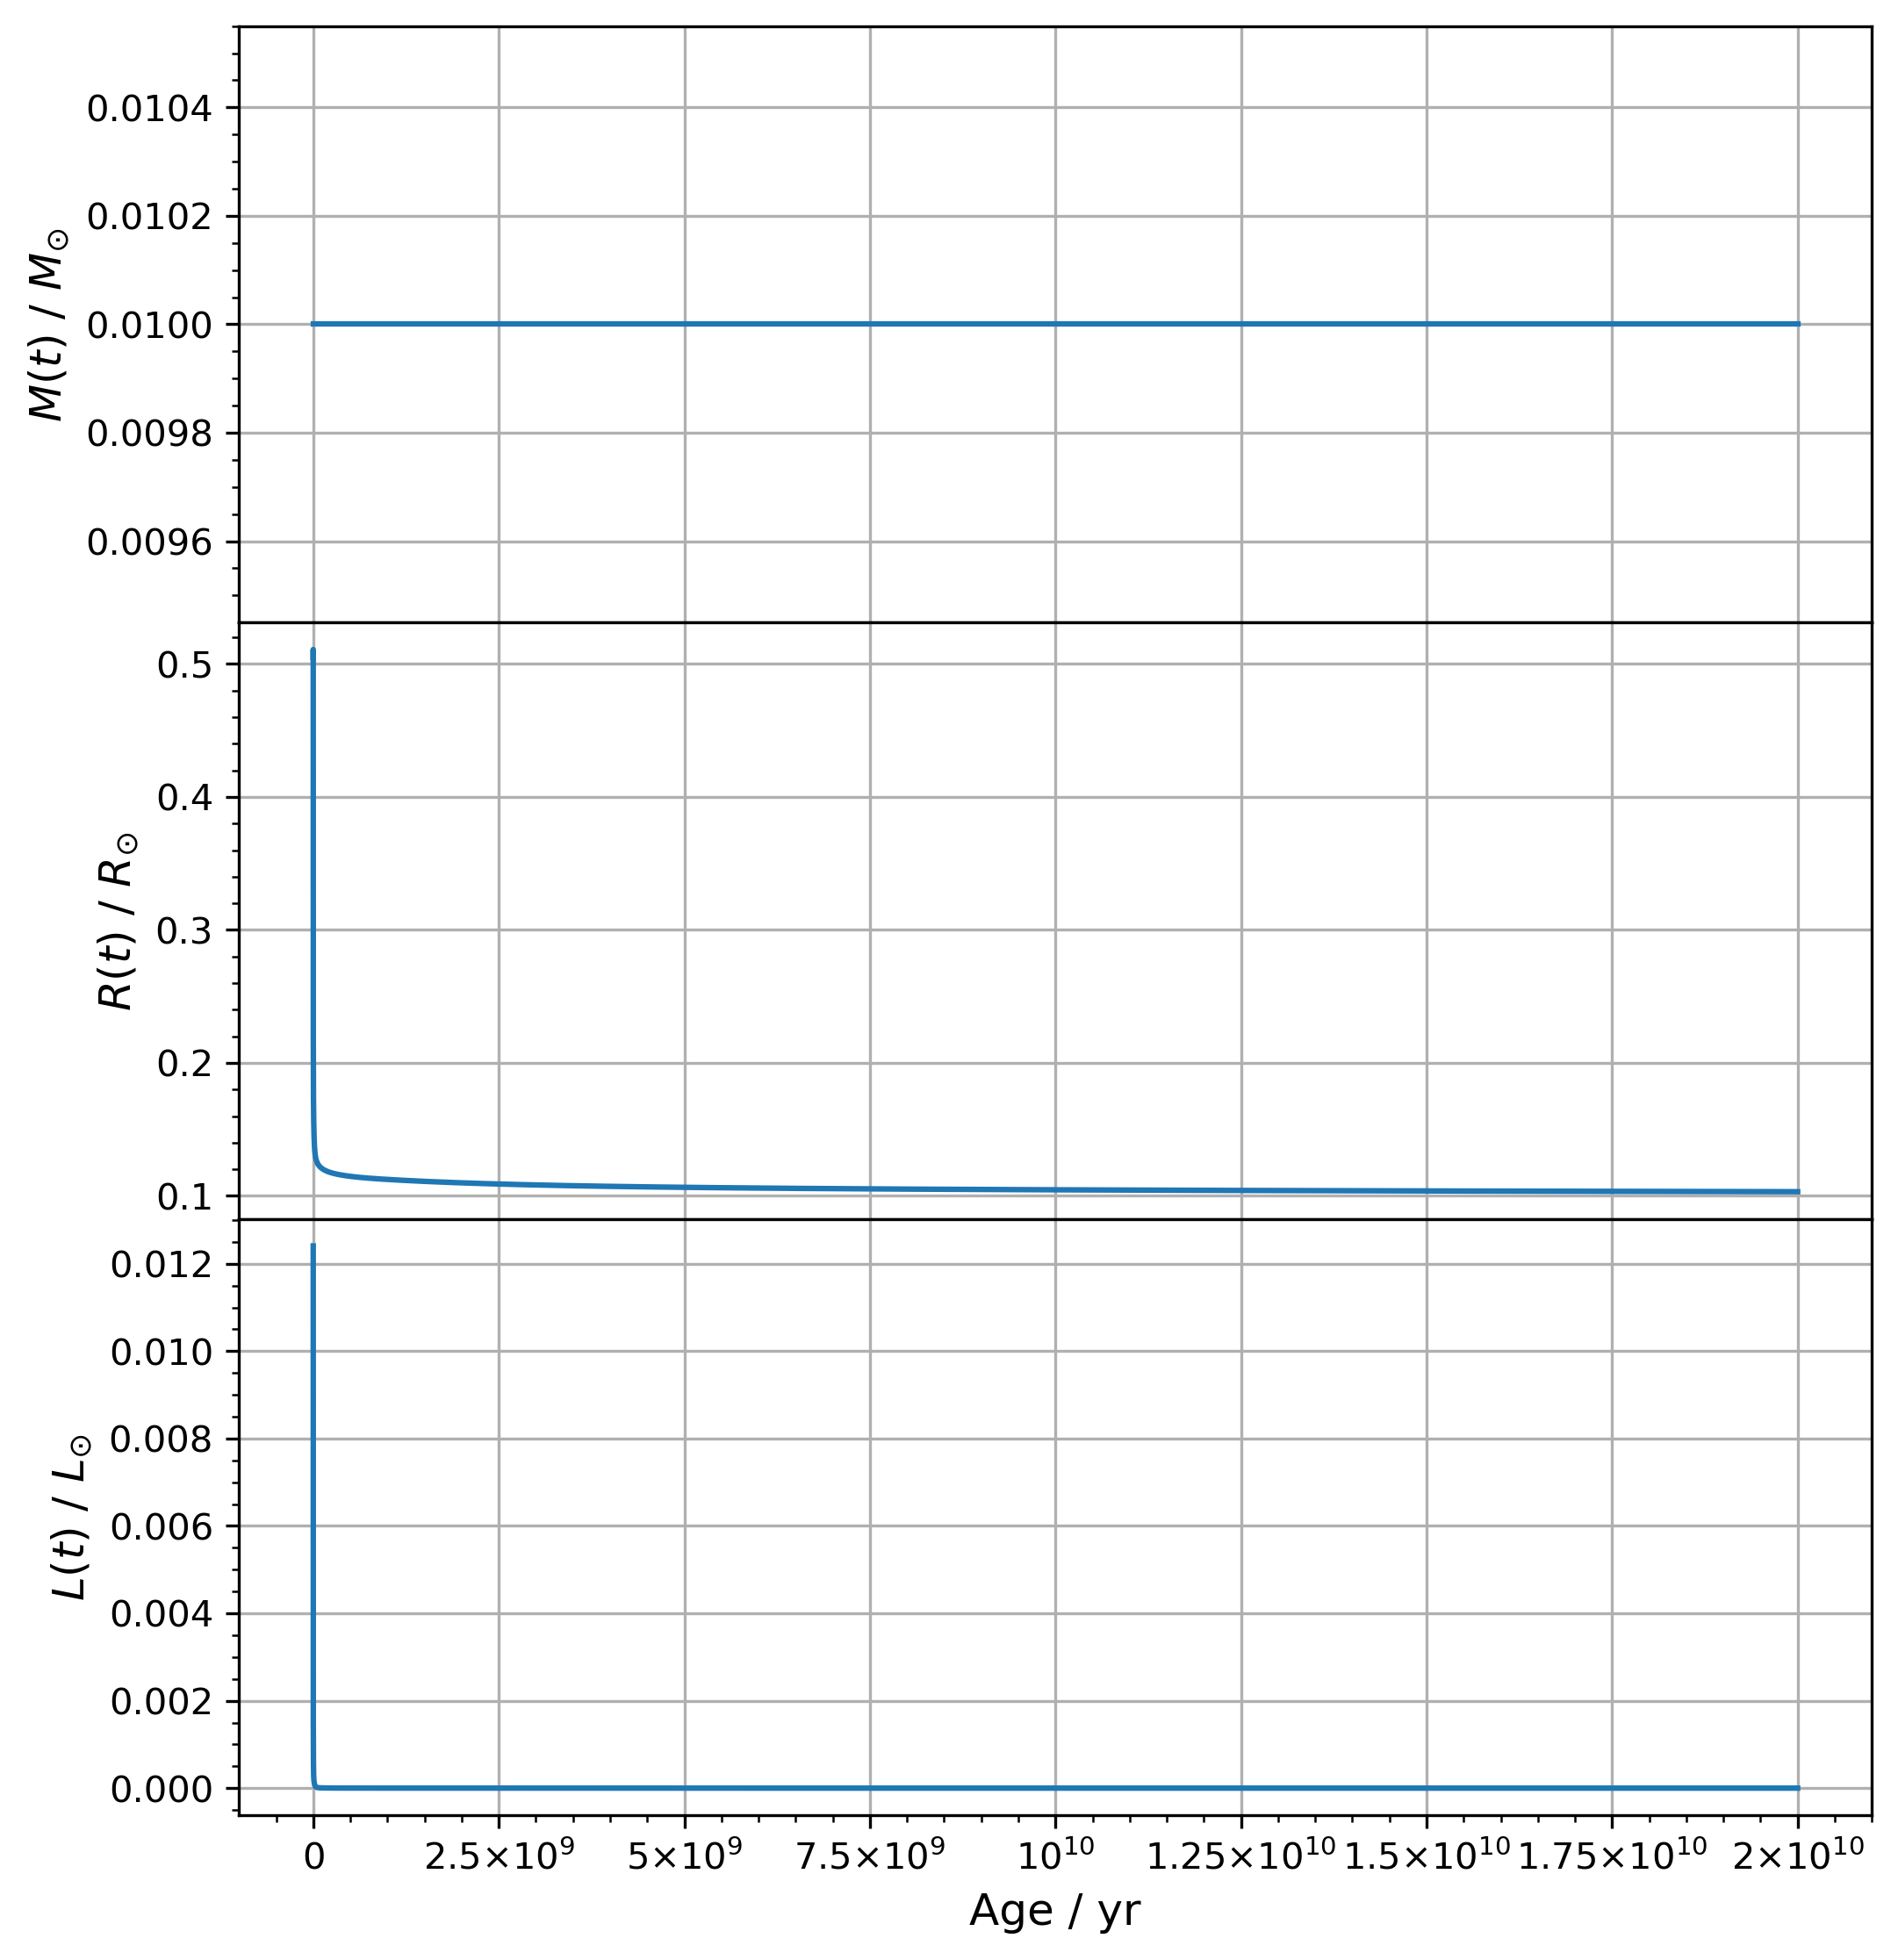

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 9), dpi=300)
fig.subplots_adjust(hspace=0)

ax1.set_ylabel("$M(t)$ / $M_{\odot}$", fontsize='large')
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.plot(ages, masses)
ax1.grid()

ax2.set_ylabel('$R(t)$ / $R_{\odot}$', fontsize='large')
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.plot(ages, radii)
ax2.grid()

ax3.set_xlabel('Age / yr', fontsize='large')
ax3.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax3.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.set_ylabel('$L(t)$ / $L_{\odot}$', fontsize='large')
ax3.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax3.plot(ages, lumins)
ax3.grid()

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('plots/make_brown_dwarf_mrl.png')

## Export

Finally, by calling the function defined below, and passing the relevant parameters, we can export the time-value series data to a `.txt` file consisting of only these two columns separated by a tab (whitespace).

In [4]:
def writetxt(ages, values, path='data.txt'):
    """
    Function to output time-value series data to a two-column text file.
        
    Parameters
    ----------
    ages : numpy.ndarray
        Monotonic array of times (stellar ages) to be written out to the first
        column of the data file.
    values : numpy.ndarray
        Array of values (particular stellar property) to be written out to the
        second column of the data file.
    path : str
        Path and filename of the data file to be outputted.
        Default path set to working directory and filename "data.txt"
    """
    with open(path, 'w') as f: # will overwrite existing file
        for i in range(ages.size):
            f.write('%.16E\t%.16E\n' % (ages[i], values[i]))

In [5]:
writetxt(ages, masses, 'etas/m_make_brown_dwarf.txt')
writetxt(ages, radii, 'etas/r_make_brown_dwarf.txt')
writetxt(ages, lumins, 'etas/l_make_brown_dwarf.txt')